### SYRIATEL CUSTOMER CHURN PREDICTION

### PROJECT OVERVIEW:

In Syria, the telecommunications industry faces a significant challenge in retaining customers amidst increasing competition and evolving consumer preferences. 
SyriaTelcom, one of the leading telecom service providers in the country, seeks to reduce customer churn by identifying patterns and factors contributing to customer attrition. 
High customer churn not only results in revenue loss but also undermines the company's reputation and market position.

![](What-are-5G-Cell-Towers.jpeg)

### BUSINESS PROBLEM OBJECTIVE:

SyriaTel, a telecommunications company, aims to proactively address customer churn to retain valuable customers, reduce revenue loss, and enhance overall customer satisfaction and loyalty.
To achieve this objective, SyriaTel seeks to develop a predictive model capable of identifying customers at risk of churn.
By leveraging historical customer data and predictive analytics, SyriaTel aims to anticipate potential churn events and implement targeted retention strategies to mitigate churn and foster long-term customer relationships.


### OBJECTIVE:
The objective of this project is to analyze SyriaTelcom's customer data to understand the factors influencing churn and develop predictive models to forecast customer attrition. By leveraging machine learning algorithms and predictive analytics, the project aims to:

Identify key features and patterns associated with customer churn and non-churn.

Build predictive models to forecast the likelihood of churn for individual subscribers.

Provide actionable insights to SyriaTelcom for implementing targeted retention strategies and reducing customer attrition.

Enhance customer satisfaction and loyalty by addressing the underlying issues driving churn.

Improve SyriaTelcom's market position and competitiveness in the telecommunications industry by fostering long-term customer relationships.

### RESEARCH QUESTIONS:
1 .What are the key factors contributing to customer churn ?

2 .How do characteristics, such as location, influence the likelihood of customer churn?

3 .Are there specific contract terms or pricing plans associated with higher churn rates among customers?

4 .Which is the best model to accurately predict churn?

### DATA UNDERSTANDING:
The dataset used in this project was obtained from SyriaTelcom's internal database, which contains comprehensive records of customer interactions and telecommunications services(+3000 customers and 20 columns).This makes it highly suitable for addressing the business problem at hand of predicting customer churn for Syria Telcom.Contained in the dataset are:

Extensive customer information:Contains a set of variables that provide insights into customer behavior, preferences, and usage patterns. This includes features such as account length, call details (e.g., duration, charges), service subscriptions (e.g., voice mail plan, international plan), and customer service interactions.

Historical Data: The dataset spans a considerable time period, allowing us to analyze historical trends and patterns in customer churn. By leveraging historical data, we can identify recurring patterns and factors that contribute to customer attrition.

Granular Call Details: Detailed information about call usage, including call duration, charges, and time of day, enables us to explore how different calling patterns may influence customer churn. This granularity allows for a more nuanced understanding of customer behavior.

Target Variable (Churn): The dataset includes a binary target variable indicating whether a customer has churned or not. This allows us to frame the prediction task as a supervised learning problem, where the goal is to accurately classify customers as churners or non-churners based on their characteristics and behavior.



#### Data Exploration:
Load the dataset.

Understand the structure of the dataset (columns, data types, etc.).

Check for missing values.

Explore the distribution of target variable (churn).

Understand the distribution and characteristics of features.



#### IMPORT LIBRARIES AND LOAD DATA

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Set seaborn style
sns.set(style="whitegrid")




In [3]:
#load the data
df = pd.read_csv('bigml_59c28831336c6604c800002a 2.csv')
# observe the first five entries of the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


####  UNDERSTAND THE DATAFRAME STRUCTURE

In [4]:
#print names of all the columns in the dataset
df.shape

(3333, 21)

In [5]:
#check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Our dataset has 3,333 rows and 21 columns and no null values.We also observe that there is a mix of data types.Our target variable 'churn' is a boolean data type  making this a classification problem

-  state : Different states of the customers

- account length: number of days a customer's account has been active

- area code : location of the customer

- phone number : customer's phone number

- international plan : whether the customer uses the international plan or not

- voice mail plan : whether the customer has subscribed to vmail plan or not

- number vmail messages : if customer has a vmail plan, how many vmail messages do they get

- total day minutes : total number of call minutes used during the day

- total day calls : total number of calls made during the day

- total day charge : total charge on day calls

- total eve minutes : total number of call minutes used in the evening

- total eve calls : total calls made in the evening

- total eve charge : total charge on evening calls

- total night minutes: Total number of call minutes used at night

- total night calls : Total number of night calls

- total night charge : Total charge on night calls

- total intl minutes : total international minutes used

- total intl calls : total number of international calls made

- total intl charge : total charge on international calls

- customer service calls : number of calls made to customer service
- churn : boolean on whether the customer left or not

In [6]:
#check for missing values 
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Our dataset has no missing values.

In [7]:
df.duplicated().sum()

0

our dataset has no duplicate row values.

In [8]:
#summary of descriptive statistics for numerical columns
df.describe(include=[np.number])

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### DATA PREPARATION.
By making a copy of the dataframe, we can conduct an indepth analysis of the data's properties, distributions, and relationships, gaining valuable insights that will inform subsequent analytical steps. This approach maintains the integrity of the original dataset while enabling us to perform in-depth EDA with confidence and accuracy.

In [9]:
#make a copy of original dataframe
df2 = df.copy()
df2.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
# Drop 'phone number' columns
df2.drop(columns=['phone number'],axis=1,inplace=True)
df2.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


From our dataset we will be dropping the 'phone number' column as it is a unique identifier for each customer therefore not relevant for analysis.

### EXPLORATORY DATA ANALYSIS (EDA)

In this analysis, the 'churn' feature serves as the dependent variable.The 'churn' variable signifies whether a customer has terminated their contract with SyriaTel. A value of 'True' means a contract termination, while 'False' indicates that the customer has not terminated their contract and maintains an active account.

In [11]:
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

NUMERICAL FEATURES:(account length, number vmail messages, total day minutes, total day calls, total day charge, total eve minutes, total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl charge,customer service calls)

CATEGORICAL FEATURES: (state,area code,international plan,voicemail plan)

In [12]:
numeric_cols = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']
categoric_cols = ['state','area code','international plan','voice mail plan']

##### PIE-CHART OF NUMBER OF CHURNED AND NON-CHURNED CUSTOMERS.

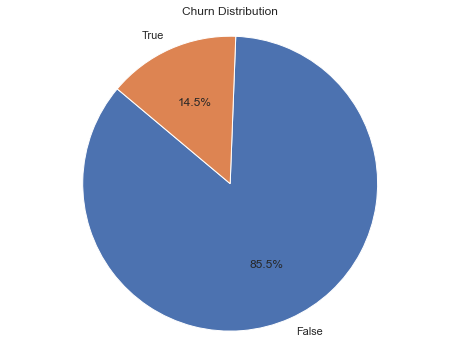

In [13]:
# Count the number of churned and non-churned customers
churn_counts = df['churn'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution')
plt.axis('equal')
plt.savefig('Churn_Distribution')
plt.show()

The above pie chart shows the distribution of churned and non-churned syria tel customers.The distribution is indicated in percentage,with 14.5% "true churn" indicates customers who have ended their subscription. 85.5% "false churn" indicates customers who are still active subscribers.This also shows "non-churn") has a much higher count compared to the other class ("churn"), indicating that the dataset has a class imbalance that may lead to model complications such as model bias.

#### DISTRIBUTION PLOT OF NUMERICAL VARIABLES

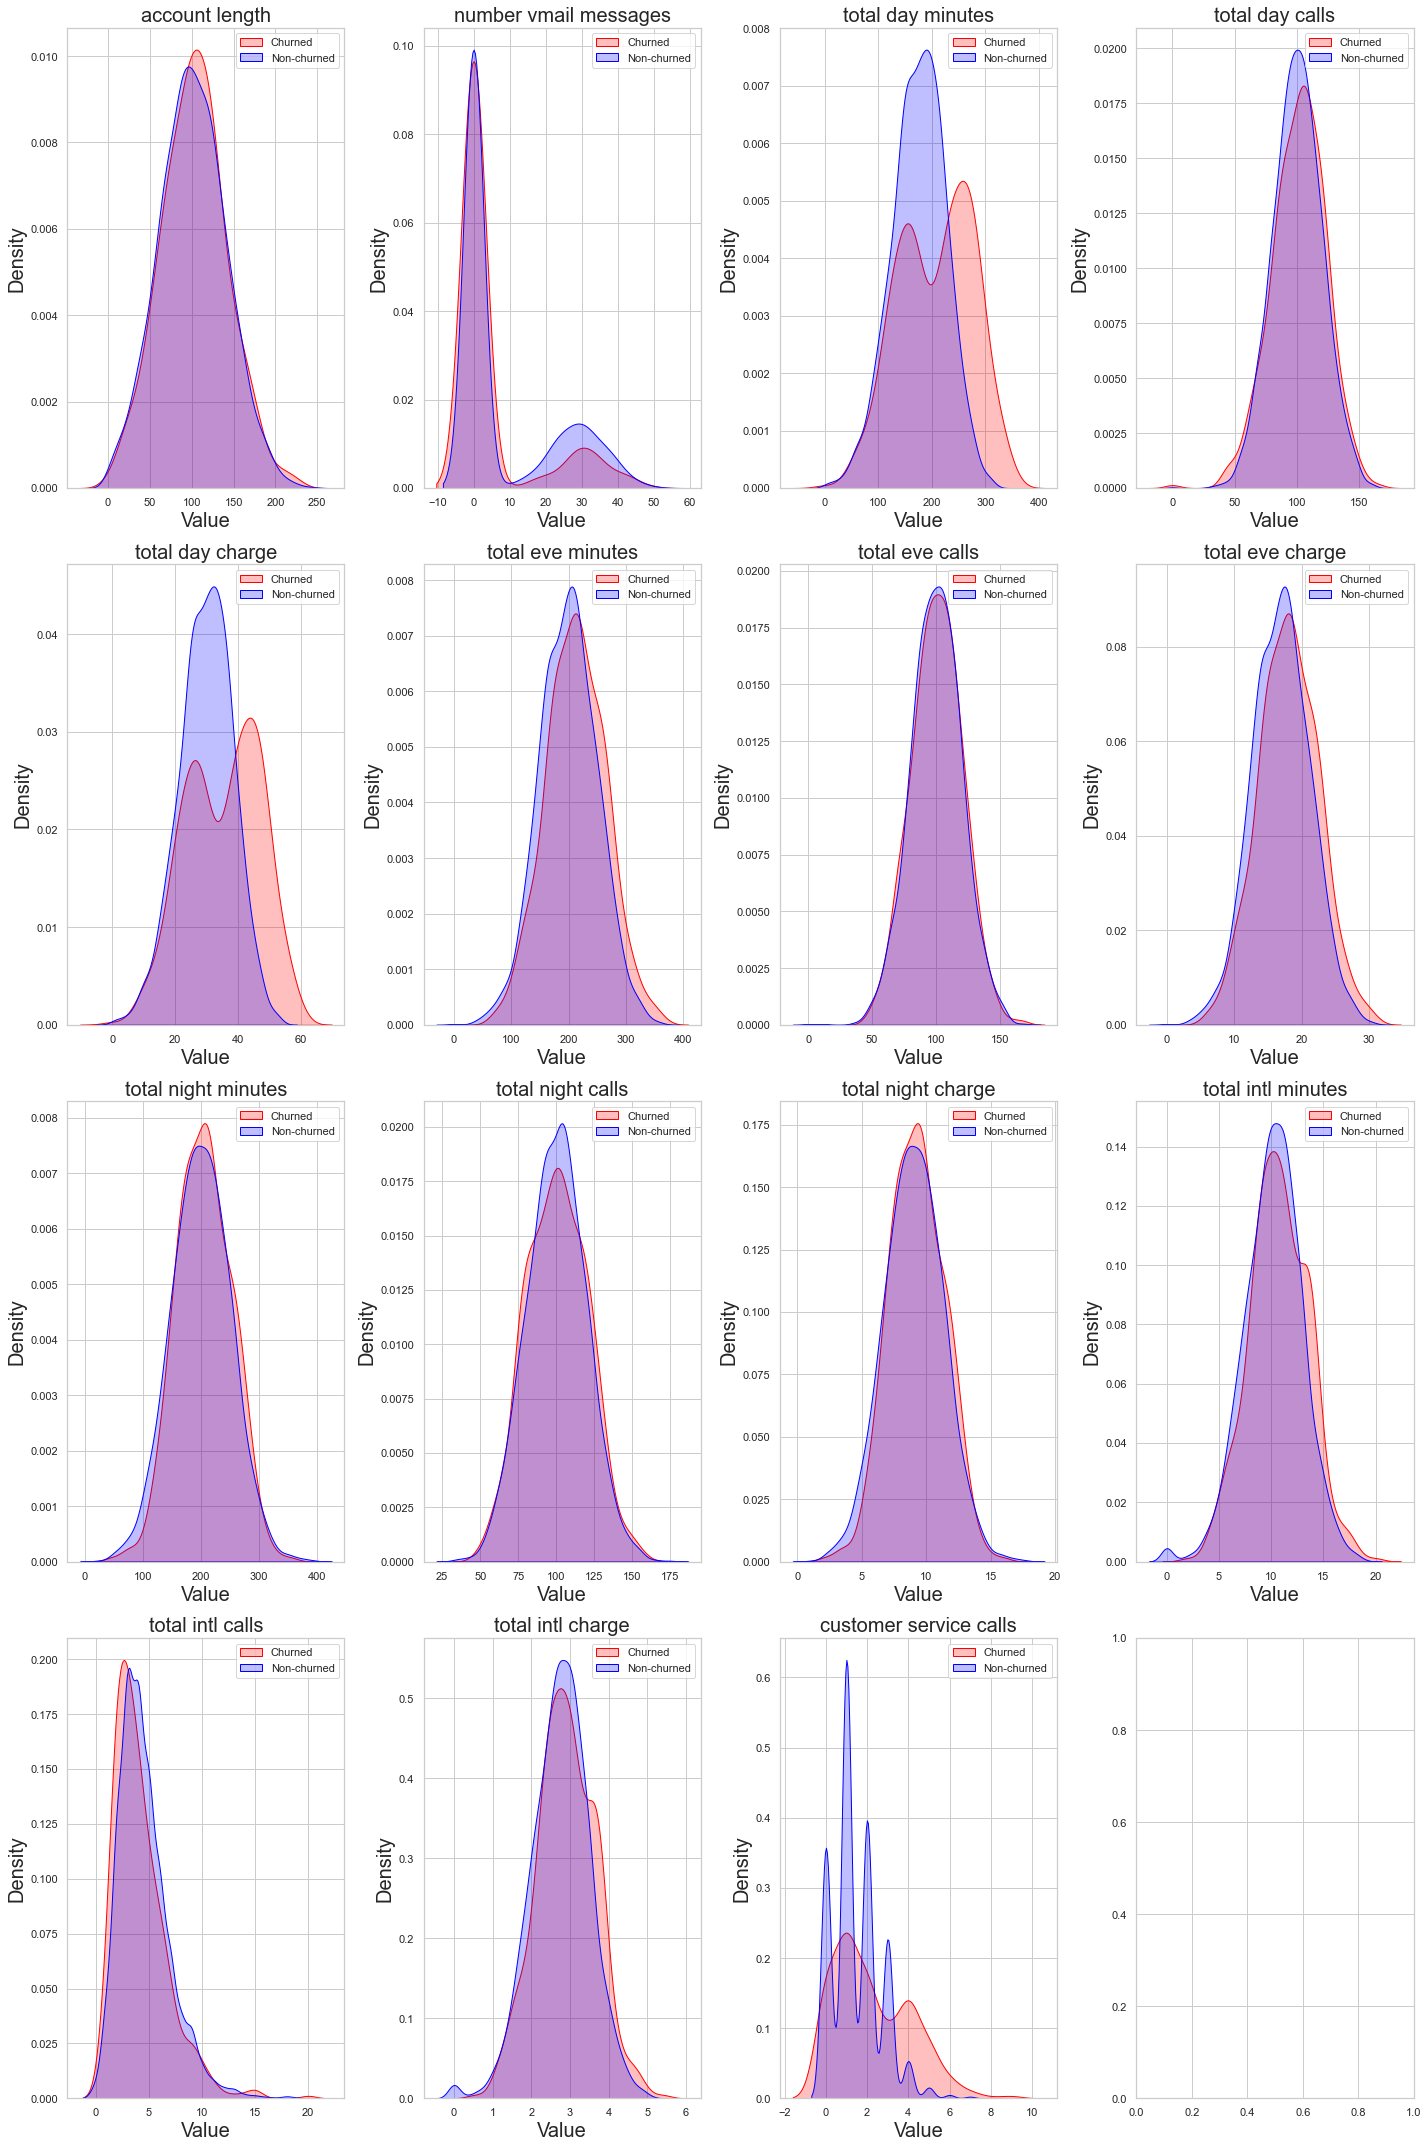

In [14]:
# Create subplots for each numerical variable
num_plots = len(numeric_cols)
num_rows = 4
num_cols = 4
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 30))

# Iterate through numerical variables
for i, var in enumerate(numeric_cols):
    row = i // num_cols
    col = i % num_cols

    # Plot churned customers
    sns.kdeplot(df[df['churn'] == True][var], shade=True, ax=axes[row, col], color='red', label='Churned')
    
    # Plot non-churned customers
    sns.kdeplot(df[df['churn'] == False][var], shade=True, ax=axes[row, col], color='blue', label='Non-churned')

    # Set title, labels, and legend
    axes[row, col].set_title(var, fontsize=20)
    axes[row, col].set_xlabel('Value', fontsize=20)
    axes[row, col].set_ylabel('Density', fontsize=20)
    axes[row, col].legend()

plt.tight_layout()
plt.savefig('numerical_distribution_plot')
plt.show()

Above are distribution plots of churned and non-churned customers in the numerical category.We observe that non-churned customers are more than churned customers.we also observe that the distribution is normal while that of  total international calls is skewed to the right though still normally distributed.Customers service calls is observed to have a few peaks  in it distribution, this could be due the column countaining float and not an interger number.

#### CUSTOMER SERVICE CALLS

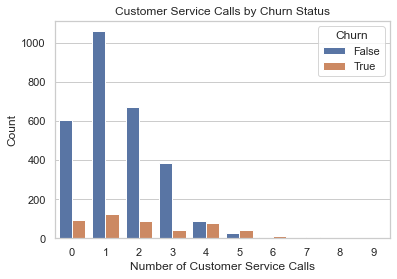

In [15]:
sns.countplot(x='customer service calls', data=df2, hue='churn').set(title='Customer Service Calls')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Count')
plt.title('Customer Service Calls by Churn Status')
plt.legend(title='Churn', loc='upper right')

# Save the plot
plt.savefig('customer_service_calls_plot')
plt.show()

There is an obvious relationship between true churn rate and customer service calls.After 4 calls this customers are a lot more likely to terminate service this  could be due to disatisfaction with the overall customer experience and/or unmet expectations.

##### PLOT DISTRIBUTION OF CUSTOMERS IN THE VARIOUS AREA CODES.

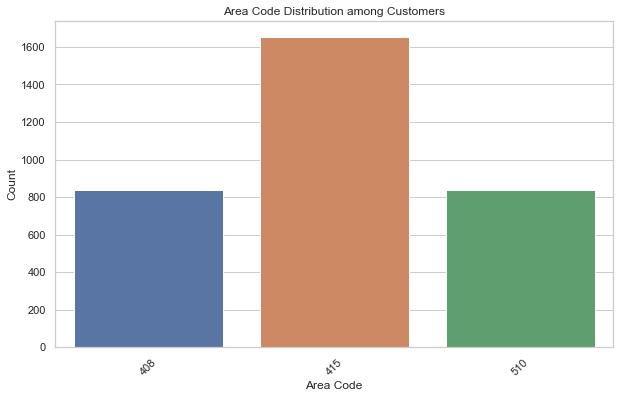

In [16]:
#count and plot the number of customers in each area code
plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='area code')
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.title('Area Code Distribution among Customers')
plt.xticks(rotation=45)
plt.savefig('Area_Code_Distribution_among_Customers')
plt.show()

This distribution indicates that the majority of SyriaTel customers, specifically 50% of them, are located in the area with the code 415. The remaining 50% of customers are evenly split between the areas with codes 510 and 408.

##### DISTRIBUTION OF CHURNED AND NON -CHURNED  CUSTOMERS IN THE AREA CODES.

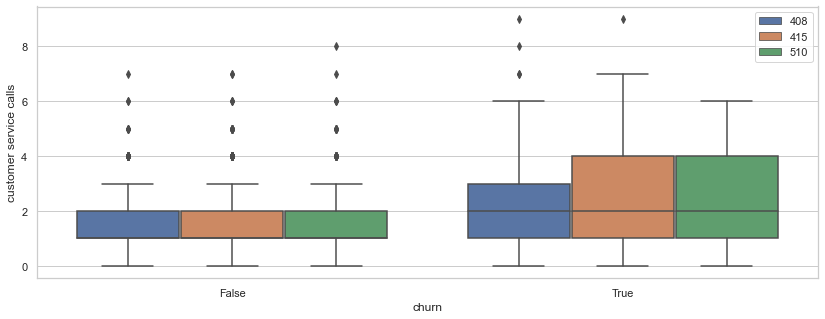

In [17]:
plt.figure(figsize=(14,5))
sns.boxplot(data=df2,x='churn',y='customer service calls',hue='area code');
plt.legend(loc='upper right');

This plot  displays the combined counts of churn and non-churn instances for each area code with area-code 415 having the highest churn count.

##### NUMERICAL COLUMN CORRELATION PLOT.

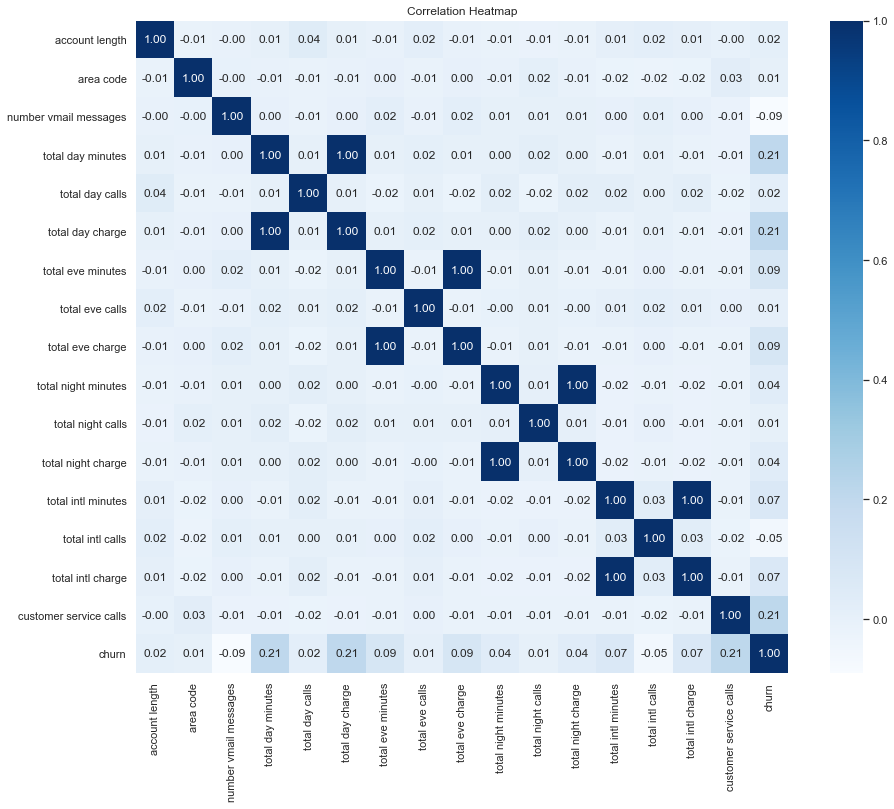

In [18]:
# Calculate the correlation matrix for all numeric columns including 'churn'
corr_mat = df2.corr()  
plt.subplots(figsize=(15,12))
sns.heatmap(corr_mat, annot=True, cmap='Blues', square=True, fmt='.2f')  
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.savefig('numeric_correlation_heatmap')
plt.show()

some of the features in the dataset  demonstrate a perfect positive correlation, such as "Total day charge" and "Total day minutes", "Total eve charge" and "Total eve minutes", "Total night charge" and "Total night minutes", and "Total int charge" and "Total int minutes".They have a correlation coefficient of 1.00, indicating perfect multicollinearity. During  modeling, perfect multicollinearity can cause issues, but its impact on the nonlinear models can vary.However when some models get affected by  perfect multicollinearity, others may not be influenced significantly.

#### CHURN BY CHARGE STATUS

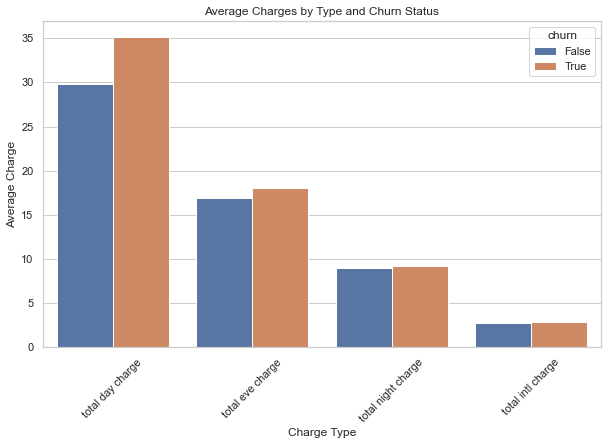

In [19]:
# Calculate average charges for each type of charge
average_charges = df2.groupby('churn')[['total day charge', 'total eve charge', 'total night charge', 'total intl charge']].mean().reset_index()

# Melt the dataframe for easier plotting
average_charges_melted = pd.melt(average_charges, id_vars='churn', var_name='charge_type', value_name='average_charge')
# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='charge_type', y='average_charge', hue='churn', data=average_charges_melted)
plt.title('Average Charges by Type and Churn Status')
plt.xlabel('Charge Type')
plt.ylabel('Average Charge')
plt.xticks(rotation=45)
plt.savefig('Average_charges_type_churn')
plt.show()

#### DISTRIBUTION OF CATEGORICAL VARIABLE

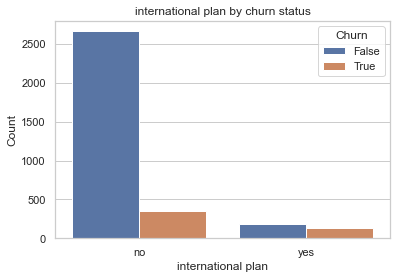

In [20]:
#cat_vars = ['state', 'international plan', 'voice mail plan']
sns.countplot(x='international plan', data=df2, hue='churn').set(title='international plan')
plt.xlabel('international plan')
plt.ylabel('Count')
plt.title('international plan by churn status')
plt.legend(title='Churn', loc='upper right')

# Save the plot
plt.savefig('international_plan_by_churn_status')
plt.show()

We have a small number of customers with an international plan howerver we observe a high churn rate among this group.Possible reasons for the high churn rate could be dissatisfaction with the international plan, international plan charges etc. Emphasizing a need for plan restructure.

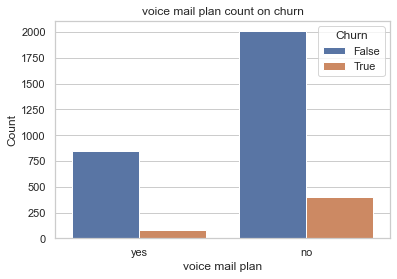

In [21]:
sns.countplot(x='voice mail plan', data=df2, hue='churn').set(title='voice mail plan')
plt.xlabel('voice mail plan')
plt.ylabel('Count')
plt.title('voice mail plan count on churn')
plt.legend(title='Churn', loc='upper right')

# Save the plot
plt.savefig('voice_mail_plan_count_on_churn')
plt.show()

We can observe from the plot above that there is a significantly low churn rate among customers with a voicemail plan.This indicates customers have a prefernce of using this plan.

#### DATA PREPROCESSING AND PREPARATION